In [8]:
import transbigdata as tbd
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import numpy as np

In [2]:
bounds = [121.4,31.15,122.0,31.35]
params = tbd.area_to_params(bounds, accuracy=500, method='rect')

In [3]:
path = 'taxi_demo/'  # 文件夹目录
files = os.listdir(path)  # 得到文件夹下的所有文件名称\
data_list = []
for file in files:  # 遍历文件夹
    if not os.path.isdir(file):  # 判断是否是文件夹，不是文件夹才打开
        data = pd.read_csv('./taxi_number/' + file, header=None)
        data.columns = ['VehicleNum', 'time', 'lng', 'lat', 'Speed', 'Speed', 'OpenStatus']
        data = tbd.clean_taxi_status(data, col=['VehicleNum', 'Time', 'OpenStatus'])
        data = tbd.clean_outofbounds(data,bounds,col=['lng','lat'])
       ## data = [data['VehicleNum'], data['time'], data['lng'], data['lat']]
        data['LONCOL'], data['LATCOL'] = tbd.GPS_to_grid(data['lng'], data['lat'], params)
        time = pd.to_datetime(data['time'])
        data = data.set_index(time)
        data_list.append(data)
data_list

[                     VehicleNum                 time         lng        lat  \
 time                                                                          
 2007-02-20 00:00:33       10109  2007-02-20 00:00:33  121.444383  31.324817   
 2007-02-20 00:01:51       10109  2007-02-20 00:01:51  121.426100  31.170000   
 2007-02-20 00:02:53       10109  2007-02-20 00:02:53  121.422600  31.169600   
 2007-02-20 00:04:45       10109  2007-02-20 00:04:45  121.444383  31.324817   
 2007-02-20 00:05:48       10109  2007-02-20 00:05:48  121.444383  31.324817   
 ...                         ...                  ...         ...        ...   
 2007-02-20 23:53:03       10109  2007-02-20 23:53:03  121.503100  31.302000   
 2007-02-20 23:53:18       10109  2007-02-20 23:53:18  121.502100  31.303500   
 2007-02-20 23:53:34       10109  2007-02-20 23:53:34  121.501300  31.305000   
 2007-02-20 23:53:53       10109  2007-02-20 23:53:53  121.500800  31.305800   
 2007-02-20 23:59:46       10109  2007-0

In [20]:
data_list[0]

,VehicleNum,time,lng,lat,Speed,Speed,OpenStatus,LONCOL,LATCOL
time,,,,,,,,,
2007-02-20 00:00:33,10109,2007-02-20 00:00:33,121.444383,31.324817,0,156,2,8,39
2007-02-20 00:01:51,10109,2007-02-20 00:01:51,121.426100,31.170000,0,135,1,5,4
2007-02-20 00:02:53,10109,2007-02-20 00:02:53,121.422600,31.169600,46,135,1,4,4
2007-02-20 00:04:45,10109,2007-02-20 00:04:45,121.444383,31.324817,0,156,2,8,39
2007-02-20 00:05:48,10109,2007-02-20 00:05:48,121.444383,31.324817,0,156,2,8,39
...,...,...,...,...,...,...,...,...,...
2007-02-20 23:53:03,10109,2007-02-20 23:53:03,121.503100,31.302000,50,157,0,20,34
2007-02-20 23:53:18,10109,2007-02-20 23:53:18,121.502100,31.303500,50,157,0,19,34
2007-02-20 23:53:34,10109,2007-02-20 23:53:34,121.501300,31.305000,30,157,0,19,34


In [4]:
data_all = pd.concat(data_list)
data_all['geometry'] = tbd.grid_to_polygon([data_all['LONCOL'], data_all['LATCOL']],params)
data_all = gpd.GeoDataFrame(data_all)
data_all

,VehicleNum,time,lng,lat,Speed,Speed,OpenStatus,LONCOL,LATCOL,geometry
time,,,,,,,,,,
2007-02-20 00:00:33,10109,2007-02-20 00:00:33,121.444383,31.324817,0,156,2,8,39,"POLYGON ((121.43945 31.32312, 121.44471 31.323..."
2007-02-20 00:01:51,10109,2007-02-20 00:01:51,121.426100,31.170000,0,135,1,5,4,"POLYGON ((121.42367 31.16574, 121.42893 31.165..."
2007-02-20 00:02:53,10109,2007-02-20 00:02:53,121.422600,31.169600,46,135,1,4,4,"POLYGON ((121.41841 31.16574, 121.42367 31.165..."
2007-02-20 00:04:45,10109,2007-02-20 00:04:45,121.444383,31.324817,0,156,2,8,39,"POLYGON ((121.43945 31.32312, 121.44471 31.323..."
2007-02-20 00:05:48,10109,2007-02-20 00:05:48,121.444383,31.324817,0,156,2,8,39,"POLYGON ((121.43945 31.32312, 121.44471 31.323..."
...,...,...,...,...,...,...,...,...,...,...
2007-02-20 22:01:35,97012,2007-02-20 22:01:35,121.416600,31.250000,28,112,0,3,22,"POLYGON ((121.41315 31.24668, 121.41841 31.246..."
2007-02-20 22:01:51,97012,2007-02-20 22:01:51,121.415600,31.249300,22,112,0,3,22,"POLYGON ((121.41315 31.24668, 121.41841 31.246..."
2007-02-20 22:03:47,97012,2007-02-20 22:03:47,121.407500,31.247300,50,135,1,1,22,"POLYGON ((121.40263 31.24668, 121.40789 31.246..."


In [21]:
dataset = pd.DataFrame(data_all.resample('5T'))
data_final = []

In [22]:
for row in dataset.itertuples():
    a = row[2].groupby(['LONCOL', 'LATCOL'])['time'].count().reset_index()
    data_final.append(a)
data_final

[     LONCOL  LATCOL  time
 0         0       3     2
 1         0      19     1
 2         0      35     1
 3         1       1     5
 4         1       2     5
 ..      ...     ...   ...
 658      65      12     5
 659      67       0     4
 660      75       1     1
 661      76       0     4
 662      76       1     5
 
 [663 rows x 3 columns],
      LONCOL  LATCOL  time
 0         0      15     1
 1         0      24     2
 2         0      29     1
 3         0      30     2
 4         0      31     1
 ..      ...     ...   ...
 635      57      10     2
 636      65      12     3
 637      67       0     5
 638      76       0     5
 639      76       1     4
 
 [640 rows x 3 columns],
      LONCOL  LATCOL  time
 0         0       3     1
 1         0      11     2
 2         0      13     3
 3         0      15     1
 4         0      21     1
 ..      ...     ...   ...
 690      65      12     4
 691      67       0     5
 692      76       0     5
 693      76       1     2
 

In [27]:
dataset.iloc[0][1]

,VehicleNum,time,lng,lat,Speed,Speed.1,OpenStatus,LONCOL,LATCOL,geometry
time,,,,,,,,,,
2007-02-20 06:00:00,3212,2007-02-20 06:00:00,121.6221,31.3056,44,45,0,42,35,POLYGON ((121.61827877523757 31.30513287962159...
2007-02-20 06:00:00,34458,2007-02-20 06:00:00,121.4998,31.2388,92,67,1,19,20,POLYGON ((121.49730499619025 31.23768380152524...
2007-02-20 06:00:00,83823,2007-02-20 06:00:00,121.4701,31.2793,0,45,0,13,29,POLYGON ((121.46574661904747 31.27815324838305...
2007-02-20 06:00:00,84233,2007-02-20 06:00:00,121.4333,31.3226,28,45,0,6,38,POLYGON ((121.42892851238089 31.31862269524085...
2007-02-20 06:00:00,85827,2007-02-20 06:00:00,121.5020,31.2636,62,22,1,19,25,POLYGON ((121.49730499619025 31.26016682755736...
...,...,...,...,...,...,...,...,...,...,...
2007-02-20 06:04:58,89527,2007-02-20 06:04:58,121.4806,31.3225,0,112,0,15,38,POLYGON ((121.47626607809507 31.31862269524085...
2007-02-20 06:04:58,89931,2007-02-20 06:04:58,121.4066,31.2328,46,135,1,1,18,"POLYGON ((121.4026298647619 31.2286905911124, ..."
2007-02-20 06:04:59,70133,2007-02-20 06:04:59,121.4328,31.3253,0,90,0,6,39,POLYGON ((121.42892851238089 31.32311930044728...


In [16]:
data_all.to_csv("./real_time load/taxi.csv",index=False)

In [9]:
load_map = []
data = pd.read_csv('./real_time load/taxi.csv')
time = pd.to_datetime(data['time'])
data = data.set_index(time)
dataset = pd.DataFrame(data.resample('5T'))
dataset = dataset[dataset[0].dt.hour.isin(np.arange(6, 24))]
for row in dataset.itertuples():
    a = row[2].groupby(['LONCOL', 'LATCOL'])['time'].count().reset_index()
    load_map.append(a)
load_map

[     LONCOL  LATCOL  time
 0         0       1     1
 1         0      12     1
 2         0      20     1
 3         0      34     2
 4         1      13     1
 ..      ...     ...   ...
 487      76       0     1
 488      76       1     3
 489      76       2     2
 490      76       3     1
 491      77       0     1
 
 [492 rows x 3 columns],
      LONCOL  LATCOL  time
 0         0       3     2
 1         0      12     3
 2         0      19     1
 3         0      23     1
 4         0      24     1
 ..      ...     ...   ...
 513      71       9     1
 514      75       3     4
 515      76       1     2
 516      76       3     2
 517      77       1     2
 
 [518 rows x 3 columns],
      LONCOL  LATCOL  time
 0         0       8     1
 1         0      12     1
 2         0      22     1
 3         0      23     6
 4         0      24     3
 ..      ...     ...   ...
 485      70       7     4
 486      73       7     1
 487      75       4     1
 488      76       0     1
 

In [10]:
len(load_map)

216

In [25]:
load_map[0]

,LONCOL,LATCOL,time
0,0,1,1
1,0,12,1
2,0,20,1
3,0,34,2
4,1,13,1
...,...,...,...
487,76,0,1
488,76,1,3
489,76,2,2
490,76,3,1


In [35]:
load_map[5]['geometry'] = tbd.grid_to_polygon([load_map[5]['LONCOL'], load_map[5]['LATCOL']],params)
load_map[5]

,LONCOL,LATCOL,time,geometry
0,0,8,1,"POLYGON ((121.3973701352381 31.18372453904817,..."
1,0,14,1,POLYGON ((121.3973701352381 31.210704170286707...
2,0,29,1,POLYGON ((121.3973701352381 31.278153248383052...
3,0,34,1,POLYGON ((121.3973701352381 31.300636274415165...
4,0,39,3,"POLYGON ((121.3973701352381 31.32311930044728,..."
...,...,...,...,...
562,67,9,1,POLYGON ((121.7497720133325 31.188221144254594...
563,68,0,1,POLYGON ((121.75503174285629 31.14775169739679...
564,70,7,4,POLYGON ((121.76555120190389 31.17922793384174...
565,71,9,1,POLYGON ((121.77081093142769 31.18822114425459...


<AxesSubplot:>

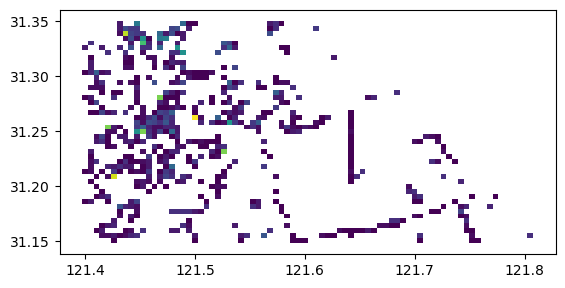

In [36]:
load_map[5] = gpd.GeoDataFrame(load_map[5])
load_map[5].plot(column = "time")